In [198]:
import matplotlib.pyplot as plt
import matplotlib.cm
import numpy as np
import scipy.io
from scipy.stats import multivariate_normal as mvn
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd

In [201]:
ex8data1 = scipy.io.loadmat("ex8data1.mat")
ex8data2 = scipy.io.loadmat("ex8data2.mat")
Xdata1 = ex8data1['X']
Xval = ex8data1['Xval']
yval = ex8data1['yval']

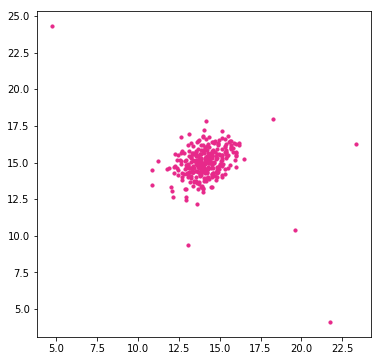

In [30]:
plt.figure(figsize=(6, 6))
plt.scatter(ex8data1['X'].transpose()[0], ex8data1['X'].transpose()[1], s=10, color=matplotlib.cm.get_cmap('Dark2')(3))

In [48]:
data1mean = np.mean(Xdata1, axis=0)
data1std = np.std(Xdata1, axis=0)
cov = np.diag(data1std)

In [83]:
xplt, yplt = np.meshgrid(np.arange(5, 22.5, 0.1), np.arange(5, 25, 0.1))
xy = np.column_stack([xplt.flat, yplt.flat])

zplt = mvn.pdf(xy, data1mean, cov).reshape(xplt.shape)

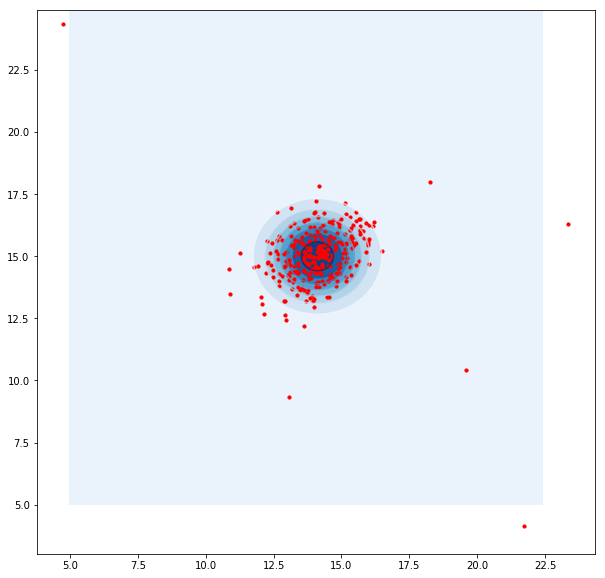

In [192]:
plt.figure(figsize=(10, 10))
plt.contourf(xplt, yplt, zplt, cmap='Blues', alpha = 1)
plt.scatter(Xdata1.transpose()[0], Xdata1.transpose()[1], s=10, color='red')
plt.contour(xplt, yplt, zplt, cmap='Blues', alpha = 0.7)

In [188]:
def select_threshold(Xval, yval):
    p = mvn.pdf(Xval, data1mean, cov)
    epsilon_grid = np.linspace(np.amin(p), np.amax(p), 1000)
    scores = []
    for eps in epsilon_grid:
        y_pred = np.less(p, eps).astype(int)
        scores.append((eps, f1_score(yval, y_pred)))
    return sorted(scores, key=lambda t: t[1])[-1]

In [190]:
epsilon, f1 = select_threshold(Xval, yval)

/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [191]:
epsilon

0.0001197380298913486

In [193]:
def predict(X, threshold):
    return np.less(mvn.pdf(X, data1mean, cov), threshold).astype(int)

In [213]:
y_pred = pd.DataFrame(predict(Xdata1, epsilon)).rename(index=str, columns={0:'pred_class'})

In [199]:
x_test = pd.DataFrame(Xdata1)

In [220]:
x_test.join(y_pred, how='outer')

/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexes/base.py:3772: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)


,0,1,pred_class
0,13.046815,14.741152,NaN
1,13.408520,13.763270,NaN
2,14.195915,15.853181,NaN
3,14.914701,16.174260,NaN
4,13.576700,14.042849,NaN
5,13.922403,13.406469,NaN
6,12.822132,14.223188,NaN
7,15.676366,15.891691,NaN
8,16.162875,16.202998,NaN
9,12.666451,14.899084,NaN


In [225]:
pd.concat([x_test, y_pred])

,0,1,pred_class
0,13.046815,14.741152,NaN
1,13.408520,13.763270,NaN
2,14.195915,15.853181,NaN
3,14.914701,16.174260,NaN
4,13.576700,14.042849,NaN
5,13.922403,13.406469,NaN
6,12.822132,14.223188,NaN
7,15.676366,15.891691,NaN
8,16.162875,16.202998,NaN
9,12.666451,14.899084,NaN


In [223]:
y_pred.shape

(307, 1)